# Introduction to Affinity Propagation

### What is Affinity Propagation?
Affinity Propagation is a message-passing algorithm that treats all data points as potential exemplars. The algorithm works by exchanging messages between data points until a set of exemplars and their associated clusters emerges. It is particularly powerful because it does not require the number of clusters to be specified beforehand and can handle large, diverse datasets with ease.

### How Affinity Propagation Works

At its core, Affinity Propagation operates by transmitting two types of messages between data points:

- **Responsibility** $r(i, k)$: How well-suited a data point is to be the exemplar for another data point.

- **Availability** $a(i, k)$:  How appropriate it would be for the candidate exemplar to be an exemplar for another point.

These messages are updated iteratively until the clusters stabilize. The data point with the highest combined responsibility and availability for another point is chosen as the exemplar for that point. This process continues until all data points are assigned to their most suitable exemplars.

### Advantages of Affinity Propagation

- **No Need to Predefine Clusters**: Unlike many clustering algorithms, Affinity Propagation does not require the number of clusters to be specified in advance.

- **Flexibility**: It can handle different types of data, including non-Euclidean data, by customizing the similarity measure.

- **Robustness**:  The algorithm is capable of finding clusters of varying sizes and shapes, making it suitable for diverse applications.

### Limitations

- **Computational Complexity**: Affinity Propagation can be computationally intensive, especially for very large datasets.

- **Sensitivity to Parameters**: The performance of the algorithm can be sensitive to the choice of the preference parameter, which influences the number of clusters.

# Implementing Affinity Propagation

This example demonstrates the application of Affinity Propagation on a synthetic dataset to perform clustering. The aim is to illustrate how the algorithm can be applied, interpret its output, and produce a visual representation of the identified clusters.

### Dataset

For simplicity, a synthetic dataset with three well-separated clusters is generated. This allows us to clearly visualize the clustering performance of Affinity Propagation.

In [1]:
from sklearn.datasets import make_blobs

# Generate synthetic dataset
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)

### Importing Necessary Libraries

To implement Affinity Propagation, the required modules are imported.

In [2]:
from affinityprop import AffinityPropagation
from sklearn.metrics import pairwise_distances

### Applying Affinity Propagation

An instance of the AffinityPropagation class is created and fitted to the synthetic dataset to perform clustering.

In [3]:
# Compute similarity matrix from data
S = -pairwise_distances(X, metric='sqeuclidean')

# Initialize Affinity Propagation
aff_prop = AffinityPropagation()  

# Fit the model
aff_prop.fit(S)

# Predict the cluster labels
labels = aff_prop.labels_

### Understanding the Output

After fitting the model, the cluster centers (exemplars) can be extracted.

In [4]:
# Retrieve the cluster centers (exemplars)
cluster_centers_indices = aff_prop.cluster_centers_indices_
n_clusters = len(cluster_centers_indices)
exemplars = X[cluster_centers_indices]

print(f"Number of clusters identified: {n_clusters}")
print("Cluster centers (exemplars):")
print(exemplars)


Number of clusters identified: 3
Cluster centers (exemplars):
[[-6.94702402 -7.01269135]
 [ 4.77433433  1.98072512]
 [-2.6246142   9.19521453]]


### Visualizing the Clusters

The clusters identified by Affinity Propagation can be visualized, along with their exemplars.

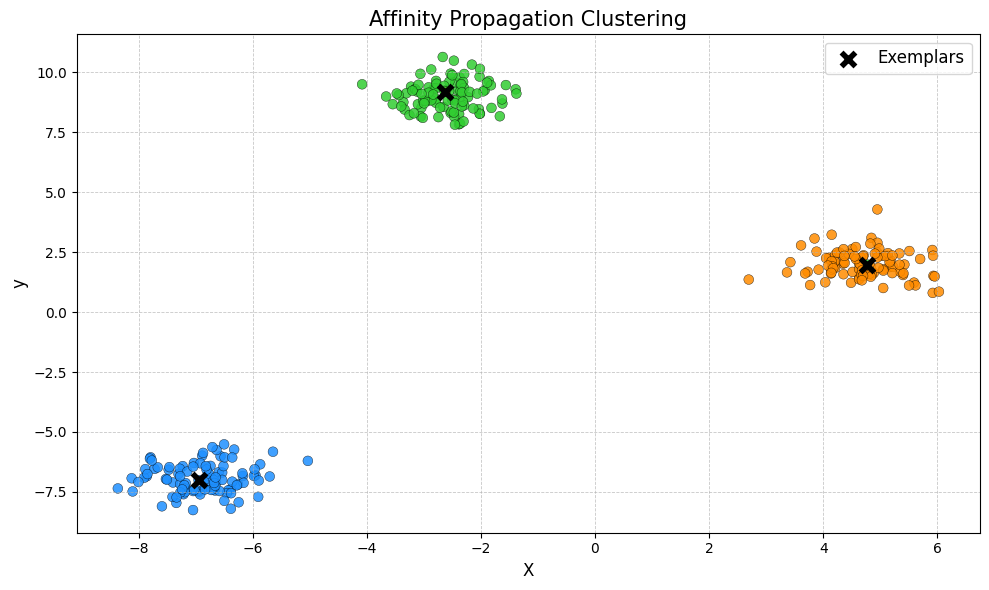

In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(['dodgerblue', 'darkorange', 'limegreen'])

# Plot the clusters with their exemplars
plt.figure(figsize=(10,6))
plt.scatter(
    X[:, 0], X[:, 1],
    c=labels,
    cmap=custom_cmap,
    s=50,
    edgecolor='black',
    linewidth=0.3,
    alpha=0.85
)

plt.scatter(
    exemplars[:, 0], exemplars[:, 1],
    c='black',
    s=100,
    marker='x',
    linewidth=4,
    label='Exemplars'
)

plt.title("Affinity Propagation Clustering", fontsize=15)
plt.xlabel("X", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.legend(frameon=True, loc='best', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.7)
plt.tight_layout()
plt.show()



### Evaluating the Clustering Performance

To evaluate the performance of the clustering, metrics such as the **Adjusted Rank Index (ARI)** and the **Silhouette Score** can be used.

In [6]:
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Adjusted Rand Index
ari = adjusted_rand_score(y_true, labels)
print(f"Adjusted Rand Index: {ari:.2f}")

# Silhouette Score
silhouette_score = silhouette_score(X, labels, metric='euclidean')
print(f"Silhouette Score: {silhouette_score:.2f}")

Adjusted Rand Index: 0.98
Silhouette Score: 0.89


# Best Practises in Affinity Propagation

Affinity Propagation is a powerful clustering algorithm, but like any other method, it requires careful tuning and understanding to achieve optimal results. This section offers best practices to avoid common mistakes made when using Affinity Propagation, with practical code examples.

### Preprocessing Your Data

Before applying Affinity Propagation, it's important to preprocess your data, especially when dealing with high-dimensional or noisy datasets. Preprocessing steps like scaling and dimensionality reduction can significantly impact the quality of clustering.

In [7]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = load_iris()
X = iris.data
y_true = iris.target

# Scale the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Fine-Tuning the Exemplar Preference

Affinity Propagation is highly sensitive to its hyperparameters, most notably the preference value, which influences the number of clusters the algorithm identifies. Without proper adjustment, the algorithm frequently overestimates the number of clusters, often resulting in fragmented or spurious groupings. This behavior arises from the way exemplar selection is governed by the interplay of similarity scores and preference thresholds.

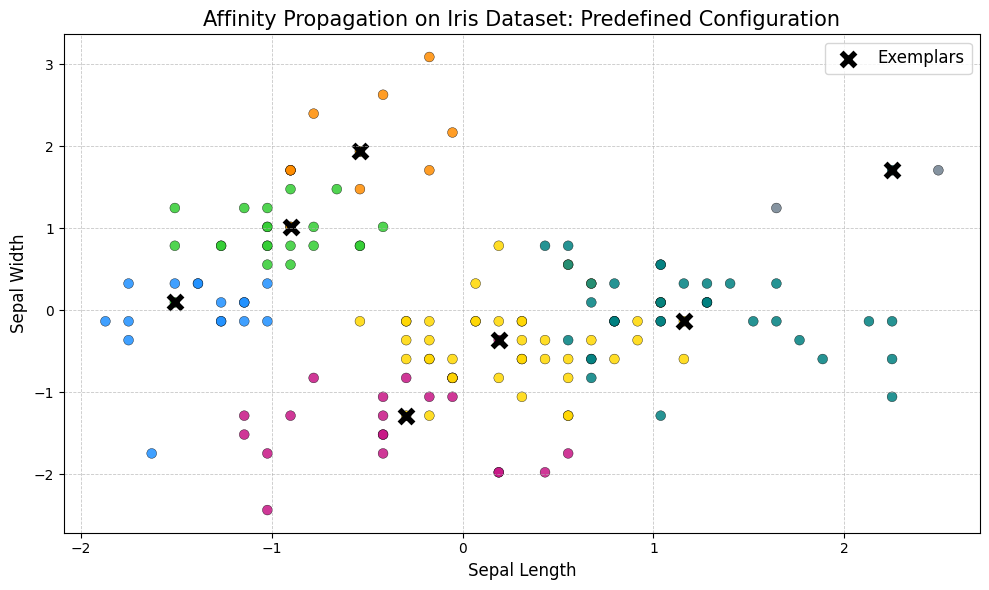

In [8]:
from sklearn.metrics import pairwise_distances
from affinityprop import AffinityPropagation  

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# Compute similarity matrix from data
S = -pairwise_distances(X_scaled, metric='sqeuclidean')

# Fit the model 
aff_prop = AffinityPropagation()
aff_prop.fit(S)

labels = aff_prop.labels_
exemplar_indices = aff_prop.cluster_centers_indices_
exemplars = X_scaled[exemplar_indices]
n_clusters = len(exemplar_indices)


# Plot the clusters with their exemplars
cmap = ListedColormap(['dodgerblue', 'darkorange', 'limegreen', 'mediumvioletred', 'gold', 'teal', 'slategray'])

plt.figure(figsize=(10,6))
plt.scatter(
    X_scaled[:, 0], X_scaled[:, 1],
    c=labels,
    cmap=cmap,
    s=50,
    edgecolor='black',
    linewidth=0.3,
    alpha=0.85
)

plt.scatter(
    exemplars[:, 0], exemplars[:, 1],
    c='black',
    s=100,
    marker='x',
    linewidth=4,
    label='Exemplars'
)

plt.title("Affinity Propagation on Iris Dataset: Predefined Configuration", fontsize=15)
plt.xlabel("Sepal Length", fontsize=12)
plt.ylabel("Sepal Width", fontsize=12)
plt.legend(frameon=True, loc='best', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.7)
plt.tight_layout()
plt.show()


In scenarios where ground truth labels are available, such as benchmark datasets, it is possible to fine-tune Affinity Propagation using external validation metrics. Measures like the **Adjusted Rand Index (ARI)** or **Normalized Mutual Information (NMI)** can be employed to assess the alignment between predicted clusters and known class labels. By systematically exploring parameter settings (e.g., through percentile-based adjustments of the preference score), configurations that maximize clustering accuracy in relation to external validation criteria can be selected.

Adjusted Rand Index: 0.63


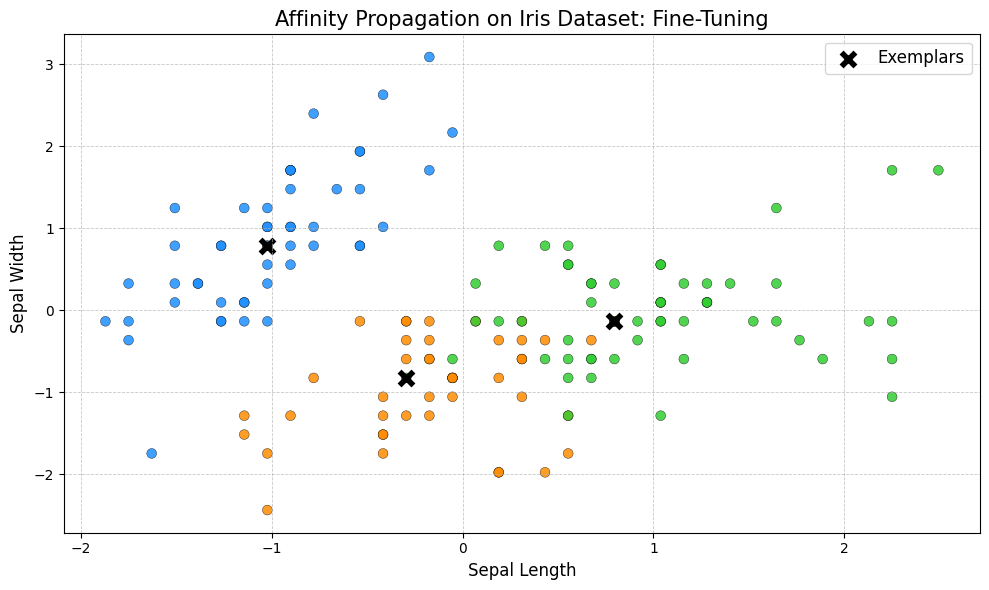

In [9]:
import numpy as np

# Compute similarity matrix from data
S = -pairwise_distances(X_scaled, metric='sqeuclidean')

# Search for best preference via percentiles of S
percentiles = np.linspace(0,50,50)
best_ari = -1
best_pref = None
best_model = None

for p in percentiles:
    pref = np.percentile(S, p)
    model = AffinityPropagation(preference=pref)
    model.fit(S)
    labels = model.labels_
    ari = adjusted_rand_score(y_true, labels)
    if ari > best_ari and len(model.cluster_centers_indices_) > 1:
        best_ari = ari
        best_pref = pref
        best_model = model


print(f"Adjusted Rand Index: {best_ari:.2f}")

# Plot the clusters with their exemplars
labels = best_model.labels_
exemplar_indices = best_model.cluster_centers_indices_
exemplars = X_scaled[exemplar_indices]
n_clusters = len(exemplar_indices)

cmap = ListedColormap(['dodgerblue', 'darkorange', 'limegreen'])

plt.figure(figsize=(10, 6))
plt.scatter(
    X_scaled[:, 0], X_scaled[:, 1],
    c=labels,
    cmap=cmap,
    s=50,
    edgecolor='black',
    linewidth=0.3,
    alpha=0.85
)

plt.scatter(
    exemplars[:, 0], exemplars[:, 1],
    c='black',
    s=100,
    marker='x',
    linewidth=4,
    label='Exemplars'
)

plt.title("Affinity Propagation on Iris Dataset: Fine-Tuning", fontsize=15)
plt.xlabel("Sepal Length", fontsize=12)
plt.ylabel("Sepal Width", fontsize=12)
plt.legend(frameon=True, loc='best', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.7)
plt.tight_layout()
plt.show()


# Affinity Propagation vs. Other Algorithms

This section shows characteristics of different clustering algorithms on datasets that are interesting but still in 2D. With the exception of the last dataset, the parameters of each of these dataset-algorithm pairs has been tuned to produce good clustering results. Some algorithms are more sensitive to parameter values than others.

The last dataset is an example of a *null* situation for clustering: the data is homogeneous, and there is no good clustering. For this example, the *null* dataset uses the same parameters as the dataset in the row above it, which represents a mismatch in the parameter values and the data structure.

While these examples give some intuition about the algorithms, this intuition might not apply to very high dimensional data.

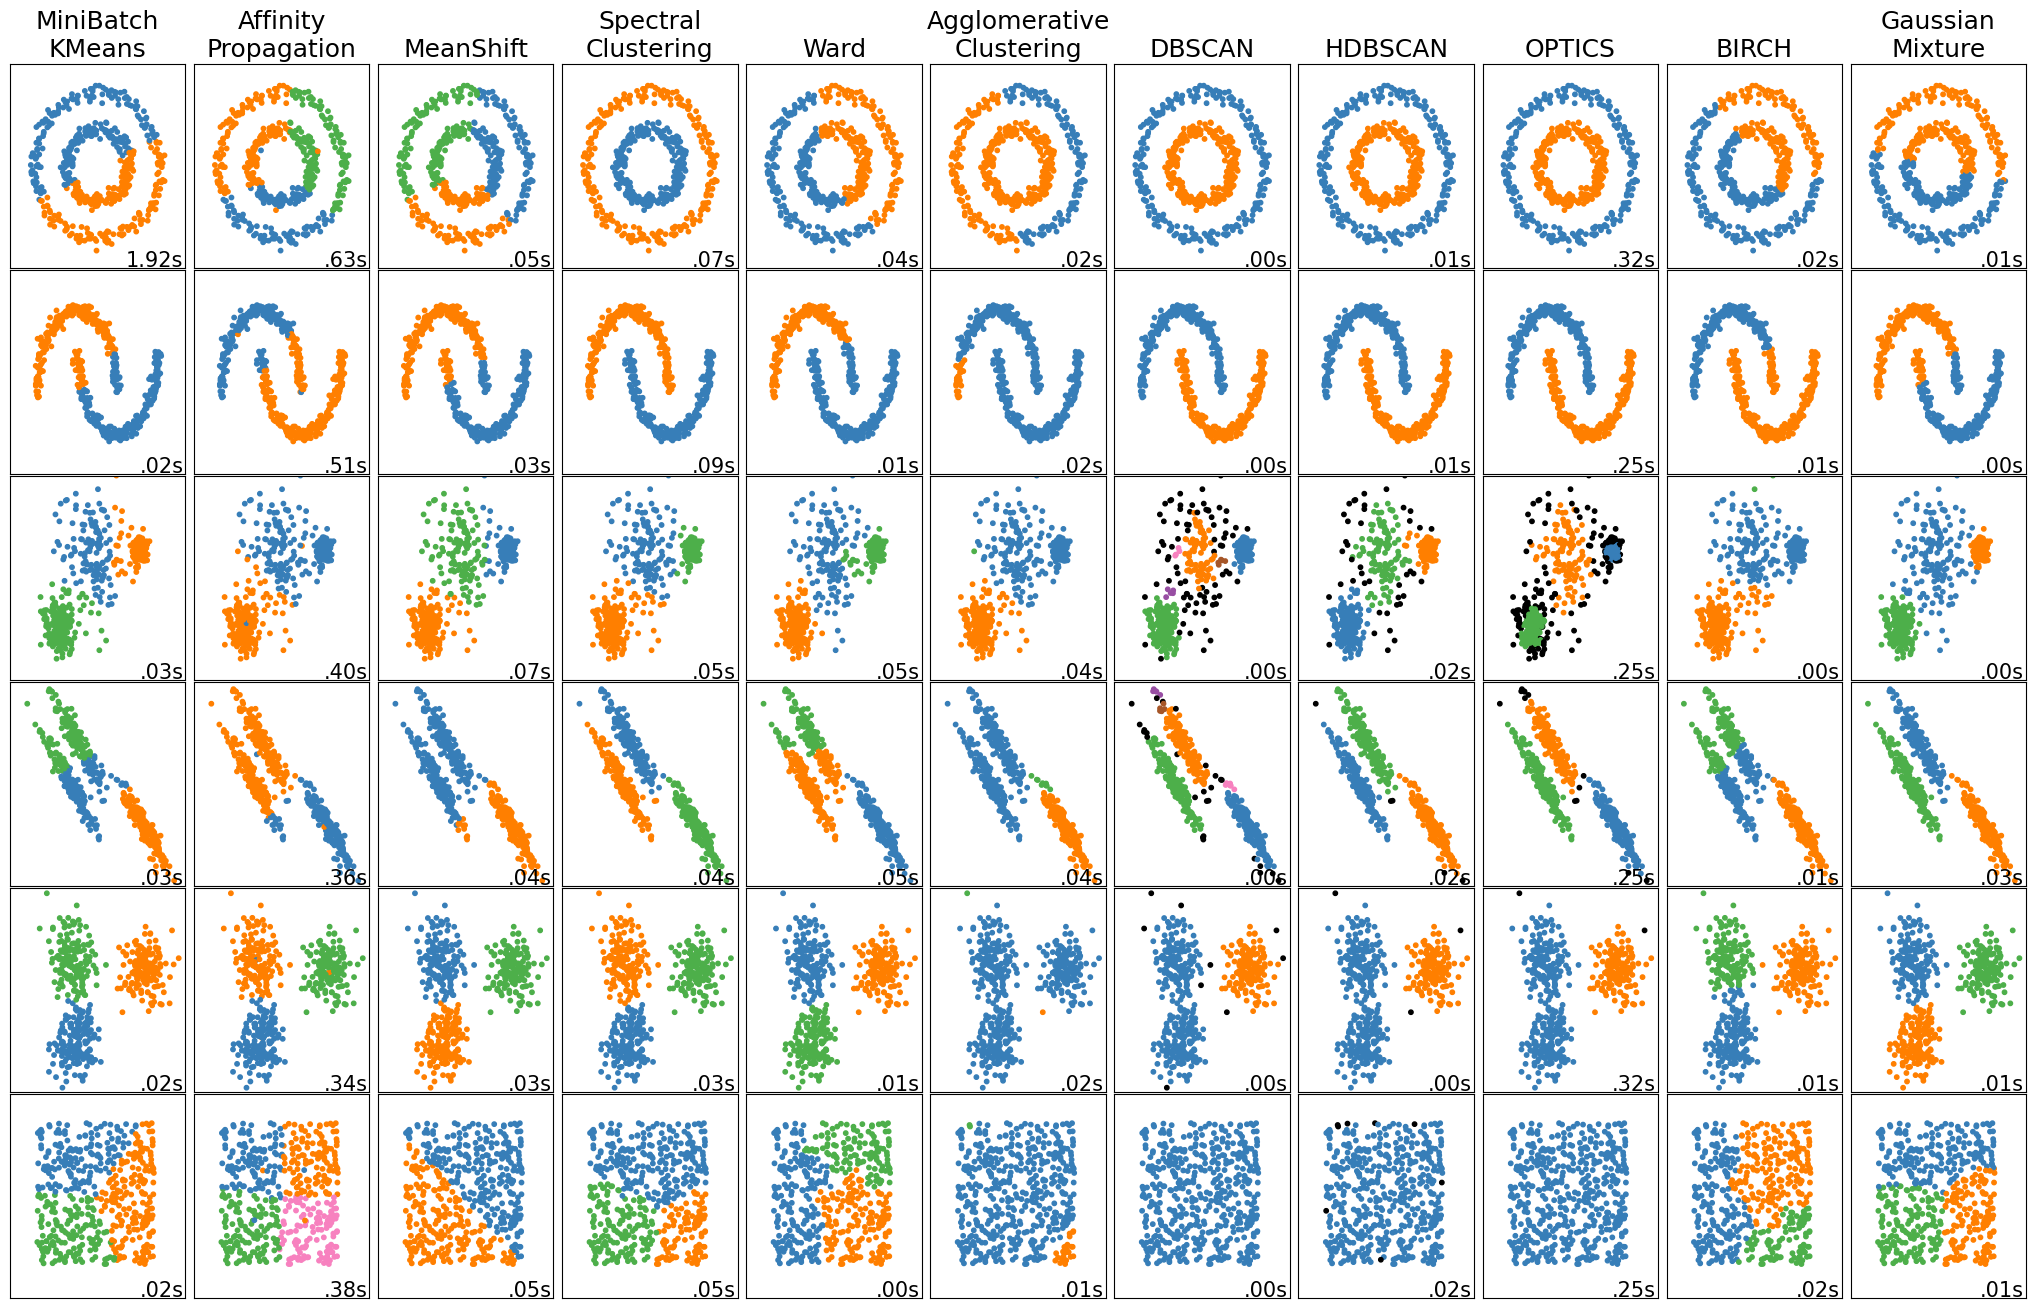

In [ ]:
import time
import warnings
from itertools import cycle, islice

import matplotlib.pyplot as plt
import numpy as np
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from affinityprop import AffinityPropagation 


# ============
# Generate datasets. Size is chosen big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times.
# ============
n_samples = 500
seed = 30
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)
rng = np.random.RandomState(seed)
no_structure = rng.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)


# ============
# Set up cluster parameters.
# ============
plt.figure(figsize=(21, 13))
plt.subplots_adjust(left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01)
plot_num = 1
default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "preference": -200,
    "damping": 0.9,
    "n_neighbors": 3,
    "n_clusters": 3,
    "min_samples": 7,
    "xi": 0.05,
    "min_cluster_size": 0.1,
    "allow_single_cluster": True,
    "hdbscan_min_cluster_size": 15,
    "hdbscan_min_samples": 3,
    "random_state": 42,
}

datasets = [
    (noisy_circles, {"damping": 0.77, "preference": -240, "quantile": 0.2, "n_clusters": 2, "xi": 0.08}),
    (noisy_moons, {"damping": 0.75, "preference": -220, "n_clusters": 2, "xi": 0.1}),
    (varied, {"eps": 0.18, "n_neighbors": 2, "xi": 0.01, "min_cluster_size": 0.2}),
    (aniso, {"eps": 0.15, "n_neighbors": 2, "xi": 0.1, "min_cluster_size": 0.2}),
    (blobs, {"xi": 0.1, "min_cluster_size": 0.2}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    params = default_base.copy()
    params.update(algo_params)
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    S = -pairwise_distances(X, metric="sqeuclidean")
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])
    connectivity = kneighbors_graph(X, n_neighbors=params["n_neighbors"], include_self=False)
    connectivity = 0.5 * (connectivity + connectivity.T)

    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params["n_clusters"], random_state=params["random_state"])
    ward = cluster.AgglomerativeClustering(n_clusters=params["n_clusters"], linkage="ward", connectivity=connectivity)
    spectral = cluster.SpectralClustering(n_clusters=params["n_clusters"], eigen_solver="arpack",
                                          affinity="nearest_neighbors", random_state=params["random_state"])
    dbscan = cluster.DBSCAN(eps=params["eps"])
    optics = cluster.OPTICS(min_samples=params["min_samples"], xi=params["xi"],
                            min_cluster_size=params["min_cluster_size"])
    hdbscan = cluster.HDBSCAN(min_samples=params["hdbscan_min_samples"],
                              min_cluster_size=params["hdbscan_min_cluster_size"],
                              allow_single_cluster=params["allow_single_cluster"])
    average_linkage = cluster.AgglomerativeClustering(linkage="average", metric="cityblock",
                                                      n_clusters=params["n_clusters"],
                                                      connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params["n_clusters"])
    gmm = mixture.GaussianMixture(n_components=params["n_clusters"], covariance_type="full",
                                  random_state=params["random_state"])
    affinity_propagation = AffinityPropagation(preference=params["preference"], damping=params["damping"])
    clustering_algorithms = (
        ("MiniBatch\nKMeans", two_means),
        ("Affinity\nPropagation", affinity_propagation),
        ("MeanShift", ms),
        ("Spectral\nClustering", spectral),
        ("Ward", ward),
        ("Agglomerative\nClustering", average_linkage),
        ("DBSCAN", dbscan),
        ("HDBSCAN", hdbscan),
        ("OPTICS", optics),
        ("BIRCH", birch),
        ("Gaussian\nMixture", gmm),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=UserWarning)
            if name == "Affinity\nPropagation":
                algorithm.fit(S)
            else:
                algorithm.fit(X)
        t1 = time.time()
        y_pred = algorithm.labels_.astype(int) if hasattr(algorithm, "labels_") else algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        
        # Add black color for outliers
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(0.99, 0.01, ("%.2fs" % (t1 - t0)).lstrip("0"),
                 transform=plt.gca().transAxes, size=15, ha="right")
        plot_num += 1

plt.show()

Here’s a summary of when to use Affinity Propagation versus other clustering algorithms:

- **Use Affinity Propagation**: When you want an algorithm that automatically determines the number of clusters and can handle non-spherical clusters without a pre-defined distance metric.
- **Use K-Means**: When you have a large dataset with well-separated, spherical clusters, and the number of clusters is known.
- **Use DBSCAN**: When your data contains noise, and clusters have arbitrary shapes.
- **Use Agglomerative Clustering**: When you need a hierarchical clustering structure or when the number of clusters is not known beforehand.
- **Use Spectral Clustering**: When dealing with complex cluster structures that require a graph-based approach for better identification.

Each algorithm has its strengths and weaknesses, and the choice of which to use depends on the specific characteristics of your dataset and the goals of your analysis.